In [7]:
import json
import pandas as pd
import seaborn as sns

In [15]:
# List of experiments, with k, chunk type, chunk size.
list_exps = [
(2, 'words', 50),
(2, 'words', 300),
(2, 'words', 500),
(5, 'words', 50),
(5, 'words', 300),
(10, 'words', 50),
(10, 'words', 300),
(2, 'sentences', 10),
(2, 'sentences', 50),
(2, 'sentences', 100),
(5, 'sentences', 10),
(10, 'sentences', 10),
(2, 'paragraphs', 1),
(2, 'paragraphs', 5),
(2, 'paragraphs', 10),
(2, 'paragraphs', 15),
(5, 'paragraphs', 1),
(5, 'paragraphs', 5),
(5, 'paragraphs', 10),
(10, 'paragraphs', 1),
(10, 'paragraphs', 5),
(1, 'pages', 1),
(2, 'pages', 1)
]

In [ ]:
# loading the metrics from the json files
list_vals = []
for TOP_K, CHUNK_TYPE, CHUNK_SIZE in list_exps:
    metrics_filename = f"outputs_r1/metrics_k{TOP_K}_type{CHUNK_TYPE}_size{CHUNK_SIZE}.json"
    #print(metrics_filename)
    metrics = json.load(open(metrics_filename))
    toAdd = {"k": TOP_K, "chunk_type": CHUNK_TYPE, "chunk_size": CHUNK_SIZE, "negative_rejection": metrics["negative_rejection_percentage"]}

    # For now I'll only load the full dataset metrics, change this if you want to load the other ones.
    dict_metrics = metrics['full_dataset']['full_dataset']
    toAdd |= dict_metrics
    list_vals.append(toAdd)

In [19]:
df = pd.DataFrame(list_vals)

In [20]:
df.head()

,k,chunk_type,chunk_size,negative_rejection,answer_relevancy,faithfulness,context_recall,context_precision,answer_correctness,EM,F1,avg_retrieve_context,avg_llm_response,avg_total,sample_size
0,2,words,50,90.0,0.605545,0.765455,0.714318,0.763636,0.603506,0.054545,0.404558,0.058654,1.102986,1.161640,110
1,2,words,300,80.0,0.672901,0.830411,0.807576,0.759091,0.655461,0.072727,0.453499,0.058809,1.230641,1.289450,110
2,2,words,500,90.0,0.649961,0.784545,0.850000,0.813636,0.643772,0.090909,0.472971,0.063309,1.113785,1.177094,110
3,5,words,50,100.0,0.658820,0.824562,0.816970,0.731414,0.617743,0.063636,0.458147,0.070781,1.336184,1.406965,110
4,5,words,300,80.0,0.708026,0.801487,0.926515,0.743333,0.681700,0.063636,0.493760,0.068165,1.254819,1.322983,110


In [67]:
def single_type_heatmap(df, chunk_type = "words", metric = "faithfulness"):
    """Pass in chunk_type and metric as strings from the dataframe columns."""
    toPlot = df[df.chunk_type==chunk_type][["k", "chunk_size", metric]]
    sns.heatmap(toPlot.pivot(index="k", columns="chunk_size", values=metric), cmap = "crest", annot = True).set_title("Chunk by "+chunk_type)

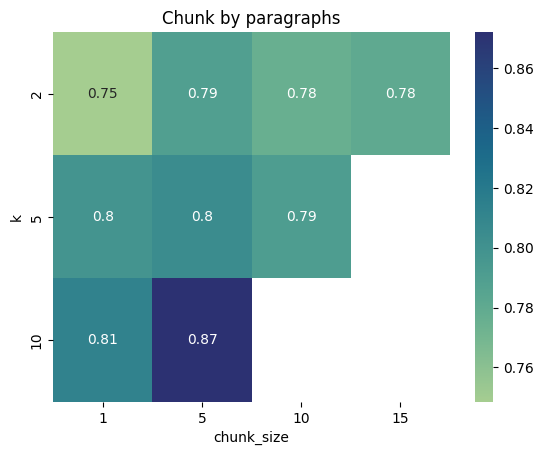

In [68]:
single_type_heatmap(df, "paragraphs", "faithfulness")


In [69]:
def all_chunks_heatmap(df, metric = "faithfulness"):
    toPlot = df[["k", "chunk_type", "chunk_size", metric]]
    sns.heatmap(toPlot.pivot(index=["chunk_type", "chunk_size"], columns="k", values=metric), cmap = "crest", annot = True).set_title(metric + " by chunks")

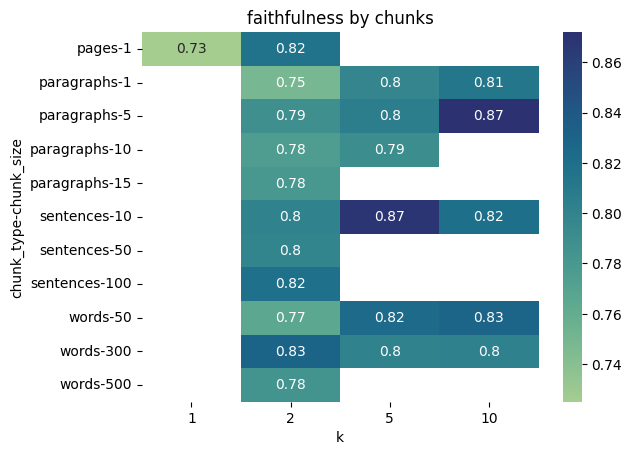

In [70]:
all_chunks_heatmap(df, "faithfulness")

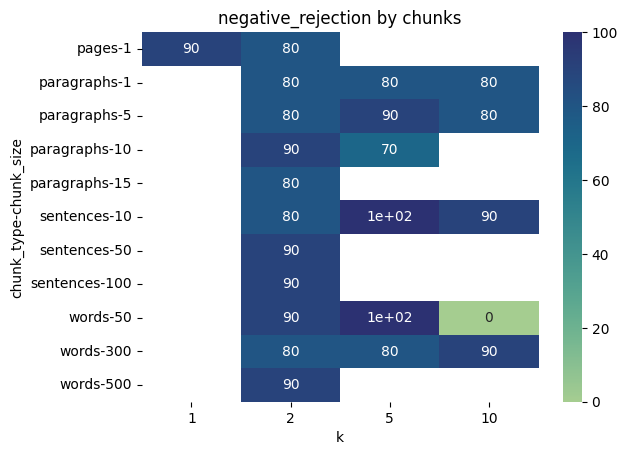

In [71]:
all_chunks_heatmap(df, "negative_rejection")

wait what happened to words-50? The drop off from k =5 to 10 is kinda weird, checking the exp_output file seems correct though, might need to check/rerun?

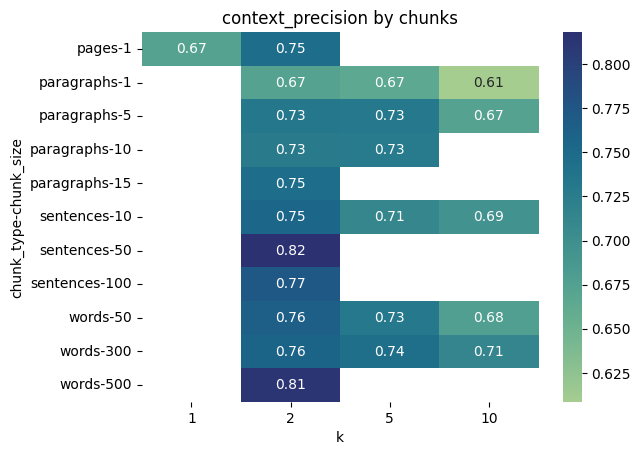

In [72]:
all_chunks_heatmap(df, "context_precision")

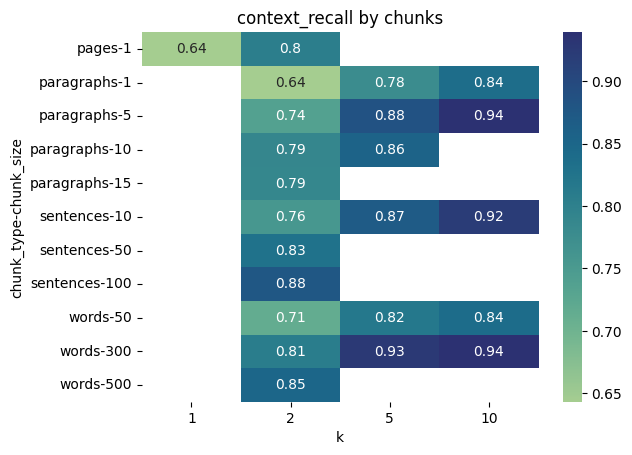

In [73]:
all_chunks_heatmap(df, "context_recall")

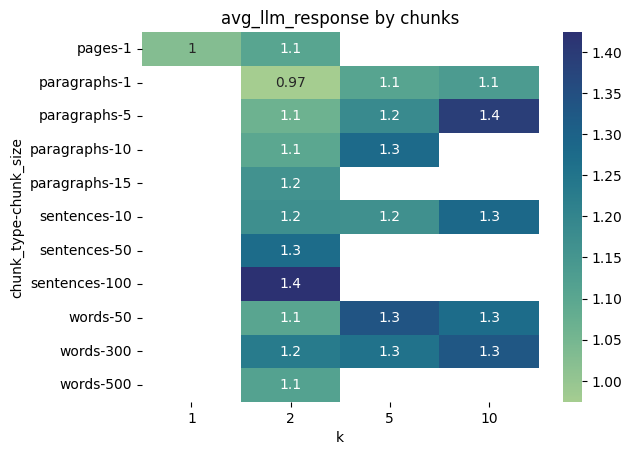

In [76]:
all_chunks_heatmap(df, "avg_llm_response")

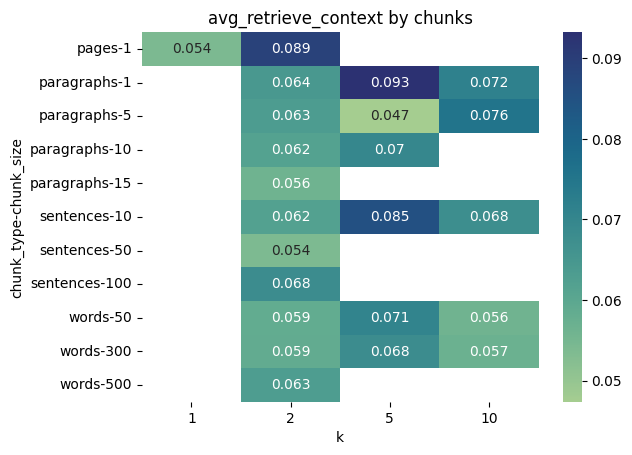

In [77]:
all_chunks_heatmap(df, "avg_retrieve_context")

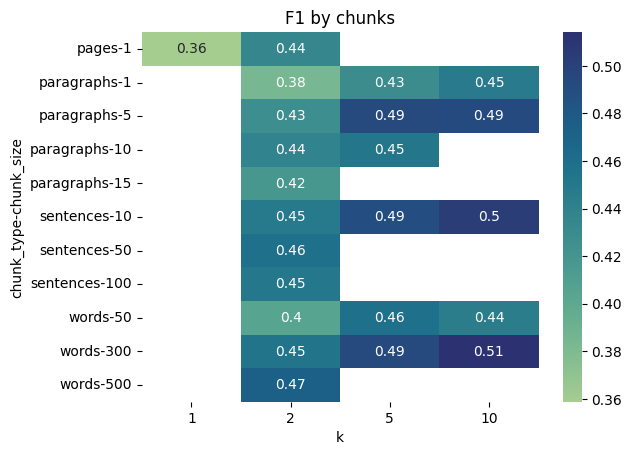

In [80]:
all_chunks_heatmap(df, "F1")

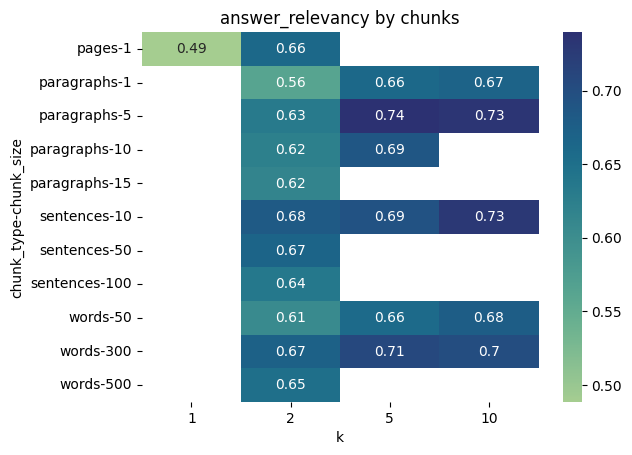

In [81]:
all_chunks_heatmap(df, "answer_relevancy")

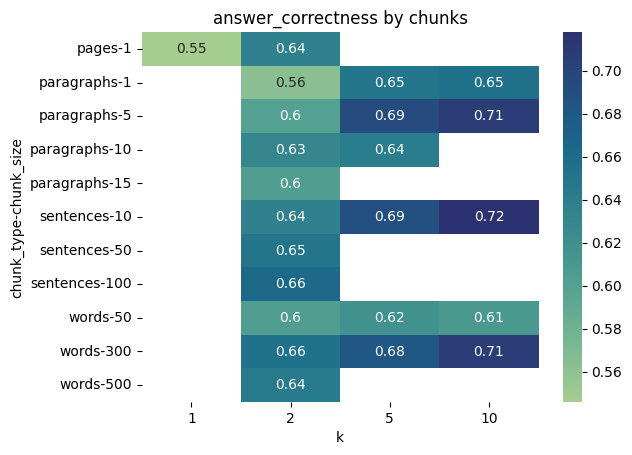

In [82]:
all_chunks_heatmap(df, "answer_correctness")